In [1]:
%load_ext autoreload
%autoreload 2

# load new frame-set

from repos.pyjunk.junktools.frameset import frameset

import repos.pyjunk.junktools.pytorch_utils as ptu
ptu.SetGPUMode(True)

g_fVerbose = False
strFramesetBaseName = 'windridge_051421_'
strFramesetName = strFramesetBaseName + str(1024)
batch_size = 128
test_batch_size = 128
#num_frames = 10
num_frames = None
start_frame = 1010
#img_sizes = [32, 64, 128, 256, 512]
img_sizes = [64]

original_frameset = frameset(strFramesetName, num_frames=num_frames, fJITLoading=True, fVerbose=g_fVerbose)

for img_size in img_sizes:
    strNewFramesetName = strFramesetBaseName + str(img_size)
    original_frameset.clear_transforms()
    original_frameset.square(max_size=img_size)
    #original_frameset.whiten(fZCA=False)
    #original_frameset.Print()
    #print(original_frameset.shape())
    original_frameset.save_to_new_frameset(strNewFramesetName)
    
    test_num_frames = 10
    new_frameset = frameset(strNewFramesetName, num_frames=test_num_frames, fJITLoading=True, fVerbose=g_fVerbose)
    print(new_frameset.shape())


Loading frames 1 to 4999


frame:   0%|          | 0/4998 [00:00<?, ?it/s]

repos/pyjunk/data/frames/windridge_051421_64/windridge_051421_64.json
Saving frames 1 to 4999


frame:   0%|          | 0/4998 [00:00<?, ?it/s]

ValueError: Could not load "" 
Reason: "Truncated File Read"
Please see documentation at: http://pillow.readthedocs.io/en/latest/installation.html#external-libraries

In [1]:
%load_ext autoreload
%autoreload 2

# Testing for number of channels (expecting 4)

from repos.pyjunk.junktools.frameset import frameset

import repos.pyjunk.junktools.pytorch_utils as ptu
ptu.SetGPUMode(True)

g_fVerbose = False
g_fJITLoading = True
strFramesetBaseName = 'reflective_primitives_'
strFramesetName = strFramesetBaseName + str(1024)
batch_size = 128
test_batch_size = 128
num_frames = 4

original_frameset = frameset(strFramesetName, num_frames=num_frames, fJITLoading=g_fJITLoading, fVerbose=g_fVerbose)

original_frameset.Print()
print(original_frameset.shape())

# Split up into RGB and respective target framesets
frameset_rgbd = frameset(
    sourceFrameset=original_frameset, 
    strNewFramesetName=strFramesetName + "_rgbd", 
    sourceChannels=[
        'Color',
        'Depth'
    ]
)

frameset_rgbd.Print()
print(frameset_rgbd.shape())

Loading frames 1 to 5


frame:   0%|          | 0/4 [00:00<?, ?it/s]

Frameset: reflective_primitives_1024, 4 frames with 13 channels JIT enabled
(4, 1024, 1024, 37)
Frameset: reflective_primitives_1024_rgbd, 4 frames with 2 channels JIT enabled
(4, 1024, 1024, 4)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Loading frames 1 to 101


frame:   0%|          | 0/100 [00:00<?, ?it/s]

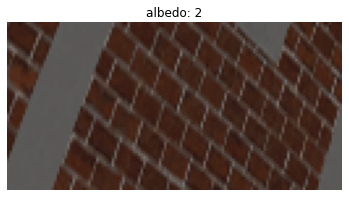

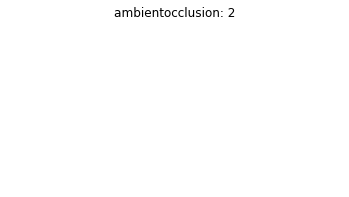

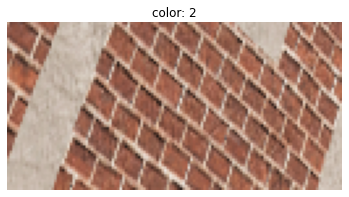

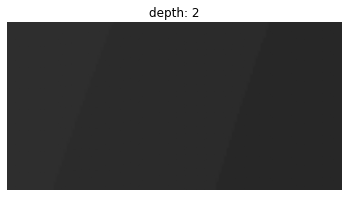

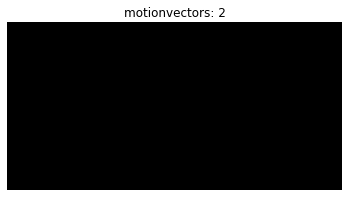

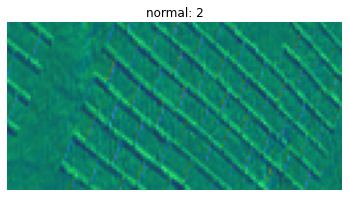

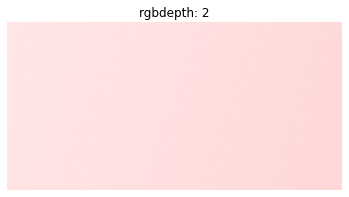

In [10]:
%load_ext autoreload
%autoreload 2

# Tests for patch loading

from repos.pyjunk.junktools.frameset import frameset

import repos.pyjunk.junktools.pytorch_utils as ptu
ptu.SetGPUMode(True)

g_fVerbose = False

target_resolution = 1024
patch_resolution = (64, 128)

strFramesetName = 'wr_210604_16MSAA_1024_center'
num_frames = None
num_frames = 100
start_frame = 10

# Load the frameset
original_frameset = frameset(
    strFramesetName, 
    num_frames=num_frames, 
    fJITLoading=True, 
    fVerbose=g_fVerbose
)

#original_frameset[1].visualize()

patchY, patchX, patchH, patchW = 30, 30, 64, 128
patch_extents = (patchY, patchX, patchH, patchW)

original_frameset[1].visualize(patch_extents=patch_extents)
